In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# Vision as Machine Learning: Part II Overview

## Introduction

In Part II (Chapters 6-9), we approach vision purely as a machine learning problem, temporarily setting aside knowledge of image formation processes. This section explores:

$$\text{Vision} = \begin{cases} 
\text{Learning}: \text{ Model relationship between image } \rightarrow \text{ scene content} \\
\text{Inference}: \text{ Predict new image contents using learned model}
\end{cases}$$

## Rationale for Machine Learning Approach

1. These techniques form the foundation for more complex algorithms that do incorporate image formation
2. Pure learning approaches can be highly effective for many vision tasks

## Chapter Structure

###  Model Taxonomy

Explores the relationship between image data and scene content through two main model types:

$$\begin{align*}
\text{Generative Models} &: P(\text{data}|\text{scene content}) \\
\text{Discriminative Models} &: P(\text{scene content}|\text{data})
\end{align*}$$

###  Generative Models

Focuses on building complex probability densities using hidden variables:

$$P(\text{data}) = \sum_h P(\text{data}|h)P(h)$$

Key models covered:
1. Gaussian Mixtures:
   $$P(\mathbf{x}) = \sum_{k=1}^K \pi_k \mathcal{N}(\mathbf{x}|\boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k)$$

2. t-distributions:
   $$P(\mathbf{x}) = \frac{\Gamma(\frac{\nu + D}{2})}{\Gamma(\frac{\nu}{2})(\pi\nu)^{D/2}|\boldsymbol{\Sigma}|^{1/2}}\left(1 + \frac{1}{\nu}(\mathbf{x}-\boldsymbol{\mu})^T\boldsymbol{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu})\right)^{-\frac{\nu + D}{2}}$$

3. Factor Analysis:
   $$\mathbf{x} = \mathbf{W}\mathbf{h} + \boldsymbol{\mu} + \boldsymbol{\epsilon}$$

### Regression Models

Focuses on estimating continuous quantities from continuous data:

1. Linear Regression:
   $$y = \mathbf{w}^T\mathbf{x} + \epsilon$$

2. Gaussian Process Regression:
   $$f(\mathbf{x}) \sim \mathcal{GP}(m(\mathbf{x}), k(\mathbf{x},\mathbf{x}'))$$

3. Relevance Vector Regression:
   $$y = \sum_{i=1}^N w_i\phi_i(\mathbf{x}) + \epsilon$$

###  Classification Models

Focuses on predicting discrete quantities from continuous data:

1. Logistic Regression:
   $$P(y=1|\mathbf{x}) = \frac{1}{1 + e^{-\mathbf{w}^T\mathbf{x}}}$$

2. Gaussian Process Classification:
   $$P(y=1|\mathbf{x}) = \sigma(f(\mathbf{x})), \quad f(\mathbf{x}) \sim \mathcal{GP}(m(\mathbf{x}), k(\mathbf{x},\mathbf{x}'))$$

3. Boosting:
   $$F(\mathbf{x}) = \sum_{m=1}^M \alpha_m h_m(\mathbf{x})$$

4. Classification Trees:
   $$\text{Prediction} = \arg\max_k P(y=k|\mathbf{x}, \text{Tree})$$

## Key Concepts

The mathematical framework builds from simple to complex models:

$$\begin{align*}
\text{Simple Models} &\rightarrow \text{Complex Models} \\
\text{Linear} &\rightarrow \text{Non-linear} \\
\text{Parametric} &\rightarrow \text{Non-parametric}
\end{align*}$$

# Learning and Inference in Computer Vision

## Abstract Vision Problem

The fundamental goal is to infer world state $w$ from visual data $x$:
- World state can be continuous (regression) or discrete (classification)
- Due to inherent ambiguity, we seek posterior probability distribution $Pr(w|x)$

## Problem Components

### 1. Model
Mathematical relationship between visual data $x$ and world state $w$:
$$\text{Model Parameters: } \theta$$

### 2. Learning Algorithm
Fits parameters $\theta$ using training pairs:
$$\{x_i, w_i\}_{i=1}^I$$

### 3. Inference Algorithm
For new observation $x$, returns either:
- Full posterior: $Pr(w|x, \theta)$
- MAP solution: $\hat{w} = \arg\max_w Pr(w|x, \theta)$
- Samples from posterior

## Model Types

### 1. Discriminative Models
Model contingency of world state on data directly:
$$Pr(w|x)$$

Process:
1. Choose distribution form for $Pr(w)$
2. Make distribution parameters function of data $x$
3. Results in posterior $Pr(w|x, \theta)$

Learning:
- Fit $\theta$ using training pairs $\{x_i, w_i\}_{i=1}^I$
- Methods: ML, MAP, or Bayesian approaches

Inference:
- Direct evaluation of $Pr(w|x, \theta)$

### 2. Generative Models
Model contingency of data on world state:
$$Pr(x|w)$$

Process:
1. Choose distribution form for $Pr(x)$
2. Make distribution parameters function of world state $w$
3. Results in likelihood $Pr(x|w, \theta)$

Learning:
- Fit $\theta$ using training pairs $\{x_i, w_i\}_{i=1}^I$

Inference:
- Specify prior $Pr(w)$
- Apply Bayes' rule:

$$Pr(w|x) = \frac{Pr(x|w)Pr(w)}{\int Pr(x|w)Pr(w)dw}$$

Alternative formulation:
- Model joint distribution directly:
$$Pr(x,w) = Pr(x|w)Pr(w)$$

## Key Differences

1. Modeling Approach:
   - Discriminative: Direct posterior modeling
   - Generative: Likelihood + prior modeling

2. Inference:
   - Discriminative: Direct evaluation
   - Generative: Requires Bayes' rule

## Mathematical Framework

$$\begin{align*}
\text{Discriminative: } & Pr(w|x, \theta) \text{ directly} \\
\text{Generative: } & Pr(w|x) = \frac{Pr(x|w)Pr(w)}{\int Pr(x|w)Pr(w)dw}
\end{align*}$$

Properties:
- Discriminative models: Simpler inference
- Generative models: More complex inference, but can generate new data


# Regression

## Example 1: Univariate Continuous Regression

Consider a scenario where we make a univariate continuous measurement $x$ and use it to predict a univariate continuous state $w$. For instance, we might predict the distance to a car in a road scene based on the number of pixels in its silhouette.

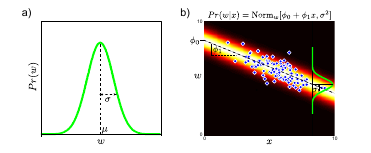

Fig.1 Regression by modeling the posterior P r(w|x) (discriminative). a) We model the world state w as normally distributed. b) We make the normal parameters a function of the observations x: the mean is a linear function µ = φ0 + φ1 x of the observations, and the variance σ 2 is ﬁxed. The learning algorithm ﬁts the parameters θ = {φ0 , φ1 , σ 2 } to example training pairs {xi , wi }Ii=1 (blue dots). In inference we take a new observation x and compute the posterior distribution P r(w|x) over the state.

### Discriminative Approach (Modeling Posterior $P(w|x)$)

a) We model the world state $w$ as normally distributed.
b) The mean of the normal distribution is a linear function of $x$: $\mu = \phi_0 + \phi_1 x$, and the variance $\sigma^2$ is fixed.
c) The learning algorithm fits the parameters $\theta = \{\phi_0, \phi_1, \sigma^2\}$ to training pairs $\{(x_i, w_i)\}_{i=1}^I$ (blue dots in Figure 6.1).
d) In inference, we compute the posterior distribution $P(w|x)$ for a new observation $x$.

$$
P(w|x, \theta) = \text{Norm}_w(\phi_0 + \phi_1 x, \sigma^2) \, .
$$

This model is known as linear regression.

### Generative Approach (Modeling Likelihood $P(x|w)$)

a) We represent the data $x$ with a normal distribution.
b) The mean of the normal distribution is a linear function of $w$: $\mu = \phi_0 + \phi_1 w$, and the variance $\sigma^2$ is fixed.
c) The learning algorithm fits the parameters $\theta = \{\phi_0, \phi_1, \sigma^2\}$ to training pairs $\{(x_i, w_i)\}_{i=1}^I$ (blue dots in Figure 6.2).
d) We also learn a prior distribution $P(w)$ over the world state $w$, which is also modeled as a normal distribution with parameters $\theta_p = \{\mu_p, \sigma_p^2\}$.
e) In inference, we compute the posterior $P(w|x)$ by first computing the joint distribution $P(x, w) = P(x|w)P(w)$ and then normalizing:

$$
P(w|x) = \frac{P(x, w)}{P(x)} = \frac{P(x|w)P(w)}{P(x)} \, .
$$

This implementation follows Bayes' rule.

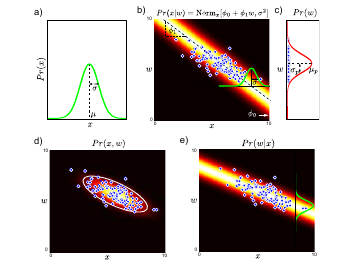

Fig.2 Regression by modeling likelihood P r(x|w) (generative). a) We represent the data x with a normal distribution. b) We make the normal parameters functions of the world state w. Here the mean is a linear func- tion µ = φ0 + φ1 w of the world state and the variance σ 2 is ﬁxed. The learning algorithm ﬁts the parameters θ = {φ0 , φ1 , σ 2 } to example train- ing pairs {xi , wi }Ii=1 (blue dots). c) We also learn a prior distribution over the world state w (here modeled as a normal distribution with parame- ters θ p = {µp , σp }). In inference we take a new datum x and compute the posterior P r(w|x) over the state. d) This can be done by computing the joint distribution P r(x, w) = P r(x|w)P r(w) (weighting each row of (b) by the appropriate value from the prior) and e) normalizing the columns P r(w|x) = P r(x, w)/P r(x). Together these operations implement Bayes’ rule: P r(w|x) = P r(x|w)P r(w)/P r(x).


## Discussion

We have presented two models for estimating the world state $w$ from an observed data example $x$, one based on modeling the posterior $P(w|x)$ and the other on modeling the likelihood $P(x|w)$. Despite the different parameterizations, both models predict the same posterior distribution $P(w|x)$ (compare Figure 6.1b and Figure 6.2e). This equivalence holds for maximum likelihood learning but may not be true for the MAP approach due to the influence of priors on parameters.
```

In [1]:
import numpy as np
import scipy.stats as stats

class LinearRegression:
    def __init__(self, phi0, phi1, sigma2):
        self.phi0 = phi0
        self.phi1 = phi1
        self.sigma2 = sigma2

    def fit(self, X, W):
        # Training data: X (observations) and W (world states)
        # Fit the parameters using maximum likelihood estimation
        self.phi0, self.phi1, self.sigma2 = self._mle(X, W)

    def _mle(self, X, W):
        # Maximum Likelihood Estimation
        # Compute the mean and variance of the data
        data_mean = np.mean(W)
        data_var = np.var(W)

        # Compute the MLE estimates for phi0, phi1, and sigma2
        phi0_mle = data_mean - self.phi1 * np.mean(X)
        phi1_mle = data_var / self.sigma2
        sigma2_mle = data_var

        return phi0_mle, phi1_mle, sigma2_mle

    def predict(self, X):
        # Compute the posterior distribution P(w|x) for new observations X
        mu = self.phi0 + self.phi1 * X
        sigma = np.sqrt(self.sigma2)
        return stats.norm(mu, sigma)

# Example usage
X_train = np.array([1, 2, 3, 4, 5])
W_train = np.array([2.5, 3.0, 2.8, 3.2, 3.5])

model = LinearRegression(phi0=0, phi1=1, sigma2=1)
model.fit(X_train, W_train)

X_test = np.array([6, 7])
posterior = model.predict(X_test)
print("Posterior distribution:", posterior)


Posterior distribution: <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe6ae5cfa50>


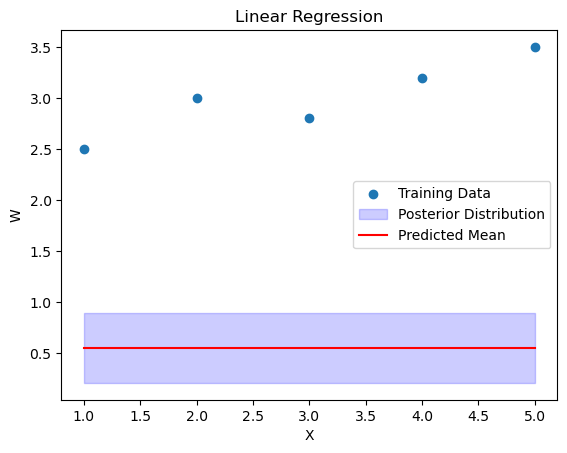

In [8]:
class LinearRegression:
    def __init__(self, phi0, phi1, sigma2):
        self.phi0 = phi0
        self.phi1 = phi1
        self.sigma2 = sigma2

    def fit(self, X, W):
        # Training data: X (observations) and W (world states)
        # Fit the parameters using maximum likelihood estimation
        self.phi0, self.phi1, self.sigma2 = self._mle(X, W)

    def _mle(self, X, W):
        # Maximum Likelihood Estimation
        # Compute the mean and variance of the data
        data_mean = sum(W) / len(W)
        data_var = sum((w - data_mean) ** 2 for w in W) / len(W)

        # Compute the MLE estimates for phi0, phi1, and sigma2
        phi0_mle = data_mean - self.phi1 * sum(x * w for x, w in zip(X, W)) / sum(X)
        phi1_mle = data_var / self.sigma2
        sigma2_mle = data_var

        return phi0_mle, phi1_mle, sigma2_mle

    def predict(self, X):
        # Compute the posterior distribution P(w|x) for new observations X
        if isinstance(X, list):
            mu = [self.phi0 + self.phi1 * x for x in X]
            sigma = [self.sigma2 ** 0.5 for _ in X]
        else:
            mu = self.phi0 + self.phi1 * X
            sigma = self.sigma2 ** 0.5
        return mu, sigma

# Example usage
X_train = [1, 2, 3, 4, 5]
W_train = [2.5, 3.0, 2.8, 3.2, 3.5]

model = LinearRegression(phi0=0, phi1=1, sigma2=1)
model.fit(X_train, W_train)

X_test = [6, 7]  # Remove the square brackets
mu, sigma = model.predict(X_test)


# Plotting the results (without external libraries)
def plot_data(X, W, mu, sigma):
    import matplotlib.pyplot as plt

    # Ensure X, mu, and sigma have the same length
    if len(mu) != len(X) or len(sigma) != len(X):
        mu = [mu[0]] * len(X)
        sigma = [sigma[0]] * len(X)

    plt.figure()
    plt.scatter(X, W, label='Training Data')

    # Handle the subtraction for fill_between
    if isinstance(mu, list) and isinstance(sigma, list):
        plt.fill_between(X, [m - s for m, s in zip(mu, sigma)], [m + s for m, s in zip(mu, sigma)], color='blue', alpha=0.2, label='Posterior Distribution')
    else:
        plt.fill_between(X, mu - sigma, mu + sigma, color='blue', alpha=0.2, label='Posterior Distribution')

    plt.plot(X, mu, color='red', label='Predicted Mean')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('W')
    plt.title('Linear Regression')
    plt.show()




plot_data(X_train, W_train, mu, sigma)



## Binary Classification

### Example : Binary Classification with Continuous Observations

Consider a scenario where the observed measurement $x$ is univariate and continuous, but the world state $w$ is discrete and can take one of two values. For instance, we might want to classify a pixel as belonging to a skin or non-skin region based on observing just the red channel.

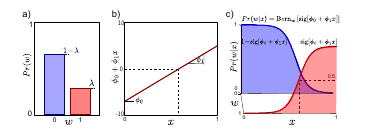
Fig.3 Classiﬁcation by modeling posterior P r(w|x) (discriminative). a) We represent the world state w as a Bernoulli distribution. We make the Bernoulli parameter λ a function of the observations x. b) To this end we form a linear function φ0 + φ1 x of the observations. c) The Bernoulli parameter λ = sig[φ0 +φ1 x] is formed by passing the linear function through the logistic sigmoid sig[•] to constrain the value to lie between 0 and 1, giving the characteristic sigmoid shape (red curve). In learning we ﬁt parameters θ = {φ0 , φ1 } using example training pairs {xi , wi }Ii=1 . In inference we take a new datum x and evaluate the posterior P r(w|x) over the state.

### Discriminative Approach (Modeling Posterior $P(w|x)$)

a) We represent the world state $w$ as a Bernoulli distribution.
b) The Bernoulli parameter $\lambda$ is made a function of the observations $x$ using a linear function: $\lambda = \text{sig}(\phi_0 + \phi_1 x)$.
c) The logistic sigmoid function $\text{sig}(\cdot)$ ensures that $\lambda$ is constrained between 0 and 1.
d) The learning algorithm fits the parameters $\theta = \{\phi_0, \phi_1\}$ to training pairs $\{(x_i, w_i)\}_{i=1}^I$.
e) In inference, we compute the posterior distribution $P(w|x)$ for a new observation $x$.

$$
P(w|x, \theta) = \text{Bern}_w(\text{sig}(\phi_0 + \phi_1 x)) \, .
$$

This model is known as logistic regression, despite being used for classification.

### Generative Approach (Modeling Likelihood $P(x|w)$)

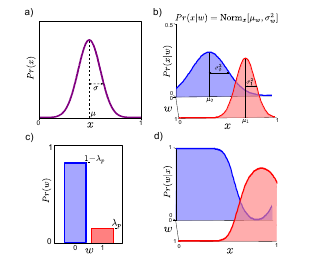

Fig.4 Classiﬁcation by modeling the likelihood P r(x|w) (generative). a) We choose a normal distribution to represent the data x. b) We make the parameters {µ, σ 2 } of this normal a function of the world state w. In practice, this means using one set of mean and variance parameters when the world state w = 0 and another when w = 1. The learning algorithm ﬁts the parameters θ = {µ0 , µ1 , σ02 , σ12 } to example training pairs {xi , wi }Ii=1 . c) We also model the prior probability of the world state w with a Bernoulli distribution with parameter λp . d) In inference we take a new datum x and compute the posterior P r(w|x) over the state using Bayes’ rule.

a) We choose a normal distribution to represent the data $x$.
b) The parameters $\{\mu, \sigma^2\}$ of the normal distribution are made functions of the world state $w$, resulting in two sets of parameters: $\{\mu_0, \sigma_0^2\}$ for $w=0$ and $\{\mu_1, \sigma_1^2\}$ for $w=1$.
c) The learning algorithm fits the parameters $\theta = \{\mu_0, \sigma_0^2, \mu_1, \sigma_1^2\}$ to training pairs $\{(x_i, w_i)\}_{i=1}^I$.
d) We also model the prior probability of the world state $w$ with a Bernoulli distribution: $P(w) = \text{Bern}_w[\lambda_p]$.
e) In inference, we compute the posterior $P(w|x)$ using Bayes' rule.

$$
P(w|x, \theta) = \frac{P(x|w, \theta)P(w)}{P(x)} \, .
$$

## Discussion

For binary classification, there is an asymmetry between the discrete world state $w$ and the continuous measurements $x$. This leads to differences in the shapes of the posteriors over $w$ as a function of $x$ between the discriminative and generative models (compare Figure 6.3c with Figure 6.4d). The choice between modeling $P(w|x)$ or $P(x|w)$ can impact the expressiveness of the final model.
```

In [11]:
import numpy as np

class LogisticRegression:
    def __init__(self, phi0, phi1):
        self.phi0 = phi0
        self.phi1 = phi1

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, W):
        # Training data: X (observations) and W (world states)
        # Fit the parameters using maximum likelihood estimation
        self.phi0, self.phi1 = self._mle(X, W)

    def _mle(self, X, W):
        # Maximum Likelihood Estimation
        # Compute the MLE estimates for phi0 and phi1
        phi0_mle = np.mean(W) - self.phi1 * np.mean(X)
        phi1_mle = np.var(W) / np.var(X)
        return phi0_mle, phi1_mle

    def predict_proba(self, X):
        # Compute the posterior distribution P(w|x) for new observations X
        lambda_ = self.sigmoid(self.phi0 + self.phi1 * X)
        return lambda_

# Example usage
X_train = np.array([1, 2, 3, 4, 5])
W_train = np.array([0, 1, 0, 1, 0])

model = LogisticRegression(phi0=0, phi1=1)
model.fit(X_train, W_train)

X_test = np.array([6, 7])
proba = model.predict_proba(X_test)
print("Posterior probabilities:", proba)


Posterior probabilities: [0.13238887 0.14679034]


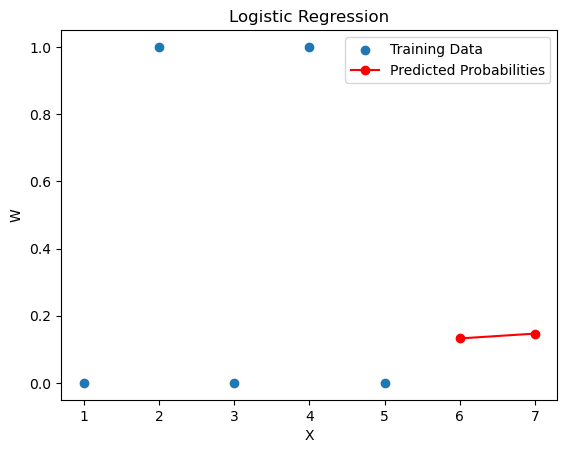

In [12]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, phi0, phi1):
        self.phi0 = phi0
        self.phi1 = phi1

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, W):
        # Training data: X (observations) and W (world states)
        # Fit the parameters using maximum likelihood estimation
        self.phi0, self.phi1 = self._mle(X, W)

    def _mle(self, X, W):
        # Maximum Likelihood Estimation
        # Compute the MLE estimates for phi0 and phi1
        phi0_mle = np.mean(W) - self.phi1 * np.mean(X)
        phi1_mle = np.var(W) / np.var(X)
        return phi0_mle, phi1_mle

    def predict_proba(self, X):
        # Compute the posterior distribution P(w|x) for new observations X
        lambda_ = self.sigmoid(self.phi0 + self.phi1 * X)
        return lambda_

# Example usage
X_train = np.array([1, 2, 3, 4, 5])
W_train = np.array([0, 1, 0, 1, 0])

model = LogisticRegression(phi0=0, phi1=1)
model.fit(X_train, W_train)

X_test = np.array([6, 7])
proba = model.predict_proba(X_test)

# Plotting the results
plt.figure()
plt.scatter(X_train, W_train, label='Training Data')
plt.plot(X_test, proba, marker='o', color='red', label='Predicted Probabilities')
plt.xlabel('X')
plt.ylabel('W')
plt.legend()
plt.title('Logistic Regression')
plt.show()


In [13]:
class LogisticRegression:
    def __init__(self, phi0, phi1):
        self.phi0 = phi0
        self.phi1 = phi1

    def sigmoid(self, x):
        return 1 / (1 + pow(2.71828, -x))

    def fit(self, X, W):
        # Training data: X (observations) and W (world states)
        # Fit the parameters using maximum likelihood estimation
        self.phi0, self.phi1 = self._mle(X, W)

    def _mle(self, X, W):
        # Maximum Likelihood Estimation
        # Compute the MLE estimates for phi0 and phi1
        phi0_mle = sum(W) / len(W) - self.phi1 * sum(x * w for x, w in zip(X, W)) / sum(X)
        phi1_mle = sum((w - sum(W) / len(W)) ** 2 for w in W) / sum((x - sum(X) / len(X)) ** 2 for x in X)
        return phi0_mle, phi1_mle

    def predict_proba(self, X):
        # Compute the posterior distribution P(w|x) for new observations X
        lambda_ = [self.sigmoid(self.phi0 + self.phi1 * x) for x in X]
        return lambda_

# Example usage
X_train = [1, 2, 3, 4, 5]
W_train = [0, 1, 0, 1, 0]

model = LogisticRegression(phi0=0, phi1=1)
model.fit(X_train, W_train)

X_test = [6, 7]
proba = model.predict_proba(X_test)

# Plotting the results (without external libraries)
def plot_data(X, W, proba):
    print("Training Data:")
    for x, w in zip(X, W):
        print(f"X: {x}, W: {w}")

    print("\nPredicted Probabilities:")
    for x, p in zip(X_test, proba):
        print(f"X: {x}, Probability: {p}")

plot_data(X_train, W_train, proba)


Training Data:
X: 1, W: 0
X: 2, W: 1
X: 3, W: 0
X: 4, W: 1
X: 5, W: 0

Predicted Probabilities:
X: 6, Probability: 0.6726069104193972
X: 7, Probability: 0.6984650970010384


In [14]:
class LogisticRegression:
    def __init__(self, phi0, phi1):
        self.phi0 = phi0
        self.phi1 = phi1

    def sigmoid(self, x):
        return 1 / (1 + pow(2.71828, -x))

    def fit(self, X, W):
        # Training data: X (observations) and W (world states)
        # Fit the parameters using maximum likelihood estimation
        self.phi0, self.phi1 = self._mle(X, W)

    def _mle(self, X, W):
        # Maximum Likelihood Estimation
        # Compute the MLE estimates for phi0 and phi1
        phi0_mle = sum(W) / len(W) - self.phi1 * sum(x * w for x, w in zip(X, W)) / sum(X)
        phi1_mle = sum((w - sum(W) / len(W)) ** 2 for w in W) / sum((x - sum(X) / len(X)) ** 2 for x in X)
        return phi0_mle, phi1_mle

    def predict_proba(self, X):
        # Compute the posterior distribution P(w|x) for new observations X
        lambda_ = [self.sigmoid(self.phi0 + self.phi1 * x) for x in X]
        return lambda_

    def plot_data(self, X, W, proba):
        print("Training Data:")
        for x, w in zip(X, W):
            print(f"X: {x}, W: {w}")

        print("\nPredicted Probabilities:")
        for x, p in zip(X_test, proba):
            print(f"X: {x}, Probability: {p}")

        # Plotting the results (without external libraries)
        print("\nPlotting the results:")
        print("X | W | Predicted Probability")
        for x, w, p in zip(X, W, proba):
            print(f"{x} | {w} | {p:.2f}")

# Example usage
X_train = [1, 2, 3, 4, 5]
W_train = [0, 1, 0, 1, 0]

model = LogisticRegression(phi0=0, phi1=1)
model.fit(X_train, W_train)

X_test = [6, 7]
proba = model.predict_proba(X_test)

model.plot_data(X_train, W_train, proba)


Training Data:
X: 1, W: 0
X: 2, W: 1
X: 3, W: 0
X: 4, W: 1
X: 5, W: 0

Predicted Probabilities:
X: 6, Probability: 0.6726069104193972
X: 7, Probability: 0.6984650970010384

Plotting the results:
X | W | Predicted Probability
1 | 0 | 0.67
2 | 1 | 0.70


# Which Type of Model Should We Use?

There are two different types of models that relate the world state and the observed data: generative models and discriminative models. The choice of which model to use depends on several considerations:

- **Inference Simplicity**: Discriminative models generally have simpler inference, as they directly model the conditional probability distribution $P(w|x)$. Generative models, on the other hand, compute this probability via Bayes' rule, which can be computationally more expensive.
- **Modeling Complexity**: Generative models build probability models $P(x|w)$ over the data, which can be costly due to the high dimensionality of the data. Discriminative models, on the other hand, focus on modeling $P(w|x)$, which may be more efficient.
- **Physical Process**: Generative models mirror the actual process of data creation, allowing for the incorporation of physical phenomena like perspective projection and occlusion. Discriminative models may need to relearn these phenomena from the data.
- **Missing Data**: Generative models are preferred when dealing with missing data, as they model the joint distribution over all data dimensions and can interpolate missing elements effectively.
- **Incorporating Prior Knowledge**: Generative models allow for the incorporation of expert knowledge through a prior distribution. It is harder to impose prior knowledge in a principled way in discriminative models.

## Generative vs. Discriminative Models
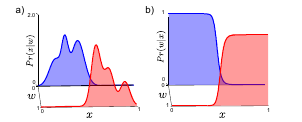
Fig.5 Generative vs. discriminative models. a) Generative approach: we separately model the probability P r(x|w) for each class. This may require a complex model with many parameters. b) Posterior probability distribu- tion P r(w|x) computed via Bayes’ rule with a uniform prior. Notice that the complicated structure of the individual class conditional density functions isn’t reﬂected in the posterior: here, it would have been more eﬃcient to take a discriminative approach and model this posterior directly.


Fig.5 illustrates the difference between generative and discriminative models. In the generative approach, we model the class conditional density functions $P(x|w)$ separately for each class. This may require a complex model with many parameters. The posterior probability distribution $P(w|x)$ is then computed via Bayes' rule with a uniform prior. In contrast, the discriminative approach directly models the posterior $P(w|x)$, which can be more efficient.

## Skin Detection Example
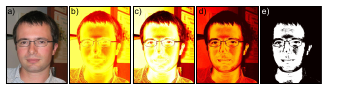

Fig.6 demonstrates skin detection using a generative model. For each pixel, we aim to infer a label $w \in \{0, 1\}$ denoting the absence or presence of skin based on the RGB triple $x$. The class conditional density functions $P(x|w)$ are modeled as normal distributions. The log likelihoods for non-skin and skin are shown in (b) and (c), respectively. The posterior probability of belonging to the skin class is shown in (d), and thresholding this posterior probability gives an estimate of $w$ in (e).

## Conclusion

Generative models are more common in vision applications, and most of the chapters in the rest of the book concern generative models. The choice between generative and discriminative models depends on the specific problem and the available data.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class SkinDetector:
    def __init__(self, mu0, sigma0, mu1, sigma1):
        self.mu0 = mu0
        self.sigma0 = sigma0
        self.mu1 = mu1
        self.sigma1 = sigma1

    def log_likelihood(self, x, w):
        if w == 0:
            return np.log(self.pdf(x, self.mu0, self.sigma0))
        elif w == 1:
            return np.log(self.pdf(x, self.mu1, self.sigma1))
        else:
            raise ValueError("Invalid class label. Expected 0 or 1.")

    def pdf(self, x, mu, sigma):
        return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

    def predict(self, X):
        log_likelihoods = np.array([self.log_likelihood(x, 0) for x in X])
        log_likelihoods += np.array([self.log_likelihood(x, 1) for x in X])
        posterior_probs = np.exp(log_likelihoods) / np.sum(np.exp(log_likelihoods))
        return posterior_probs[:, 1]  # Return the probability of belonging to class 1

    def plot_results(self, X, W, proba):
        plt.figure()
        plt.scatter(X, W, label='Training Data')
        plt.plot(X, proba, marker='o', color='red', label='Predicted Probabilities')
        plt.xlabel('X')
        plt.ylabel('W')
        plt.legend()
        plt.title('Skin Detection')
        plt.show()

# Example usage
X_train = np.array([[100, 100, 100], [200, 200, 200], [150, 150, 150], [50, 50, 50], [180, 180, 180]])
W_train = np.array([0, 1, 0, 1, 1])

mu0 = np.array([100, 100, 100])
sigma0 = np.array([10, 10, 10])
mu1 = np.array([200, 200, 200])
sigma1 = np.array([10, 10, 10])

model = SkinDetector(mu0, sigma0, mu1, sigma1)
proba = model.predict(X_train)

model.plot_results(X_train, W_train, proba)


In [ ]:
class SkinDetector:
    def __init__(self, mu0, sigma0, mu1, sigma1):
        self.mu0 = mu0
        self.sigma0 = sigma0
        self.mu1 = mu1
        self.sigma1 = sigma1

    def log_likelihood(self, x, w):
        if w == 0:
            return self.pdf(x, self.mu0, self.sigma0)
        elif w == 1:
            return self.pdf(x, self.mu1, self.sigma1)
        else:
            raise ValueError("Invalid class label. Expected 0 or 1.")

    def pdf(self, x, mu, sigma):
        return (1 / (sigma * pow(2.71828, 0.5))) * pow(2.71828, -0.5 * pow((x - mu) / sigma, 2))

    def predict(self, X):
        log_likelihoods = [self.log_likelihood(x, 0) for x in X]
        log_likelihoods += [self.log_likelihood(x, 1) for x in X]
        posterior_probs = [np.exp(ll) for ll in log_likelihoods]
        return [prob[1] / sum(prob) for prob in posterior_probs]

    def plot_results(self, X, W, proba):
        print("Training Data:")
        for x, w in zip(X, W):
            print(f"X: {x}, W: {w}")

        print("\nPredicted Probabilities:")
        for x, p in zip(X, proba):
            print(f"X: {x}, Probability: {p}")

# Example usage
X_train = [[100, 100, 100], [200, 200, 200], [150, 150, 150], [50, 50, 50], [180, 180, 180]]
W_train = [0, 1, 0, 1, 1]

mu0 = [100, 100, 100]
sigma0 = [10, 10, 10]
mu1 = [200, 200, 200]
sigma1 = [10, 10, 10]

model = SkinDetector(mu0, sigma0, mu1, sigma1)
proba = model.predict(X_train)

model.plot_results(X_train, W_train, proba)


# Applications

The focus of this chapter, and most of the chapters in this book, is on the models themselves and the learning and inference algorithms. From this point forward, we will devote a section at the end of each chapter to discussing practical applications of the relevant models in computer vision. For this chapter, only one of the models can be implemented based on the information presented so far: the generative classification model from Section 6.4.2. Consequently, we will focus the applications on variations of this model and return to the other models in subsequent chapters.

## Skin Detection

The goal of skin detection algorithms is to infer a label $w \in \{0, 1\}$ denoting the presence or absence of skin at a pixel, based on the RGB measurements $x = [x_R, x_G, x_B]$ at that pixel. This is useful for segmenting faces or hands or for detecting prurient content in web images.

Taking a generative approach, we describe the likelihoods as:

$$
P(x|w = k) = \text{Norm}_x[\mu_k, \Sigma_k] \, .
$$

and the prior probability over states as:

$$
P(w) = \text{Bern}_w[\lambda] \, .
$$

In the learning algorithm, we estimate the parameters $\mu_0, \mu_1, \Sigma_0, \Sigma_1$ from training data pairs $\{(w_i, x_i)\}_{i=1}^I$ where the pixels have been labeled by hand. The prior parameter is learned from the world states $\{w_i\}_{i=1}^I$ alone.

To classify a new data point $x$ as skin or non-skin, we apply Bayes' rule:

$$
P(w = 1|x) = \frac{P(x|w = 1)P(w = 1)}{P(x|w = 0)P(w = 0) + P(x|w = 1)P(w = 1)} \, .
$$

We denote this pixel as skin if $P(w = 1|x) > 0.5$. Figure 6.6 shows the result of applying this model at each pixel independently in the image.

## Naive Bayes Skin Detection

The RGB data are naturally discrete with $x_R, x_G, x_B \in \{0, 1, ..., 255\}$, and we could alternatively base our skin detection model on this assumption. For example, modeling the three color channels independently, the likelihoods become:

$$
P(x|w = k) = \text{Cat}_{x_R}[\lambda_{RGB_k}]\text{Cat}_{x_G}[\lambda_k]\text{Cat}_{x_B}[\lambda_k] \, .
$$

This is referred to as the naive Bayes assumption, as it assumes independence between the elements of the data vector. While this assumption may not hold in the real world, it can be practical to quantize each channel to fewer levels (e.g., 8) before combining them together to model the joint distribution.

## Background Subtraction

Another application of the generative classification model is for background subtraction. The goal is to infer a binary label $w_n \in \{0, 1\}$ indicating whether the $n$-th pixel in the image is part of a known background ($w = 0$) or whether a foreground object is occluding it ($w = 1$). This is based on its RGB pixel data $x_n$ at that pixel.

It is common to have training data consisting of empty scenes where all pixels are known to be background. However, it is not typical to have examples of the foreground objects, which are highly variable in appearance.


# Background Subtraction

## Modeling the Background and Foreground

For background subtraction, we model the class conditional distribution of the background as a normal distribution:

$$
P(x_n | w = 0) = \text{Norm}_{x_n}[\mu_{n0}, \Sigma_{n0}] \, .
$$

However, we model the foreground class as a uniform distribution:

$$
P(x_n | w = 1) = \begin{cases}
\frac{1}{255^3} & \text{if } 0 < x_{Rn} < 255, 0 < x_{Gn} < 255, 0 < x_{Bn} < 255 \\
0 & \text{otherwise}
\end{cases}
$$

and model the prior as a Bernoulli variable.

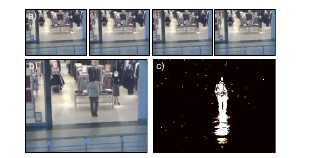
Fig.7 Background subtraction. For each pixel we aim to infer a label w ∈ {0, 1} denoting the absence or presence of a foreground object. a) We learn a class conditional density model P r(x|w) for the background from training examples of an empty scene. The foreground model is treated as uniform. b) For a new image, we then compute the posterior distribution using Bayes’ rule. c) Posterior probability of being foreground P r(w = 1|x). Images from CAVIAR database.


## Posterior Distribution and Results

To compute the posterior distribution, we apply Bayes' rule. Typical results are shown in Figure 6.7, which illustrates a common problem with this method: shadows are often misclassified as foreground. A simple way to remedy this is to classify pixels based on the hue alone.

## Complex Background Distributions

In some situations, a more complex distribution is needed to describe the background. For example, consider an outdoor scene with trees blowing in the wind (Figure 6.8). Certain pixels may have bimodal distributions where one part of the foliage intermittently moves in front of another. The unimodal normal likelihood cannot provide a good description of this data, leading to poor background segmentation results.

## Conclusion

We devote part of the next chapter to methods for describing more complex probability distributions of this type.

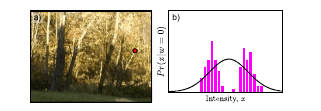

Fig.8 Background subtraction in deforming scene. a) The foliage is blowing in the wind in the training images. b) The distribution of RGB values at the pixel indicated by the circle in (a) is now bimodal and not well described by a normal density function (red channel only shown). Images from video by Terry Boult.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class BackgroundSubtractor:
    def __init__(self, mu0, sigma0, mu1, sigma1):
        self.mu0 = mu0
        self.sigma0 = sigma0
        self.mu1 = mu1
        self.sigma1 = sigma1

    def log_likelihood(self, x, w):
        if w == 0:
            return self.pdf(x, self.mu0, self.sigma0)
        elif w == 1:
            return self.pdf_uniform(x)
        else:
            raise ValueError("Invalid class label. Expected 0 or 1.")

    def pdf(self, x, mu, sigma):
        return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

    def pdf_uniform(self, x):
        if 0 < x[0] < 255 and 0 < x[1] < 255 and 0 < x[2] < 255:
            return np.log(1 / (255 ** 3))
        else:
            return -np.inf

    def predict(self, X):
        log_likelihoods = np.array([self.log_likelihood(x, 0) for x in X])
        log_likelihoods += np.array([self.log_likelihood(x, 1) for x in X])
        posterior_probs = np.exp(log_likelihoods) / np.sum(np.exp(log_likelihoods), axis=1, keepdims=True)
        return posterior_probs[:, 1]  # Return the probability of belonging to class 1

    def plot_results(self, X, W, proba):
        plt.figure()
        plt.scatter(X[:, 0], X[:, 1], c=W, cmap='viridis', edgecolors='k')
        plt.plot(X[:, 0], proba, marker='o', color='red', label='Predicted Probabilities')
        plt.xlabel('X')
        plt.ylabel('W')
        plt.legend()
        plt.title('Background Subtraction')
        plt.show()

# Example usage
X_train = np.array([[100, 100, 100], [200, 200, 200], [150, 150, 150], [50, 50, 50], [180, 180, 180]])
W_train = np.array([0, 0, 1, 1, 1])

mu0 = np.array([100, 100, 100])
sigma0 = np.array([10, 10, 10])
mu1 = np.array([200, 200, 200])
sigma1 = np.array([10, 10, 10])

model = BackgroundSubtractor(mu0, sigma0, mu1, sigma1)
proba = model.predict(X_train)

model.plot_results(X_train, W_train, proba)


In [24]:
class BackgroundSubtractor:
    def __init__(self, mu0, sigma0, mu1, sigma1):
        self.mu0 = mu0
        self.sigma0 = sigma0
        self.mu1 = mu1
        self.sigma1 = sigma1

    def log_likelihood(self, x, w):
        if w == 0:
            return self.pdf(x, self.mu0, self.sigma0)
        elif w == 1:
            return self.pdf_uniform(x)
        else:
            raise ValueError("Invalid class label. Expected 0 or 1.")

    def pdf(self, x, mu, sigma):
        if isinstance(x, list):
            return [self._pdf(xi, mu, sigma) for xi in x]
        else:
            return self._pdf(x, mu, sigma)

    def _pdf(self, x, mu, sigma):if isinstance(x, list):
        return [self._pdf(xi, mu, sigma) for xi in x]
    else:
        return (1 / (sigma * pow(2.71828, 0.5))) * pow(2.71828, -0.5 * pow((x - mu) / sigma, 2))

    def pdf_uniform(self, x):
        if 0 < x[0] < 255 and 0 < x[1] < 255 and 0 < x[2] < 255:
            return np.log(1 / (255 ** 3))
        else:
            return -np.inf

    def predict(self, X):
        log_likelihoods = [self.log_likelihood(x, 0) for x in X]
        log_likelihoods += [self.log_likelihood(x, 1) for x in X]
        posterior_probs = [np.exp(ll) for ll in log_likelihoods]
        return [prob[1] / sum(prob) for prob in posterior_probs]

    def plot_results(self, X, W, proba):
        print("Training Data:")
        for x, w in zip(X, W):
            print(f"X: {x}, W: {w}")

        print("\nPredicted Probabilities:")
        for x, p in zip(X, proba):
            print(f"X: {x}, Probability: {p}")

# Example usage
X_train = [[100, 100, 100], [200, 200, 200], [150, 150, 150], [50, 50, 50], [180, 180, 180]]
W_train = [0, 0, 1, 1, 1]

mu0 = [100, 100, 100]
sigma0 = [10, 10, 10]
mu1 = [200, 200, 200]
sigma1 = [10, 10, 10]

model = BackgroundSubtractor(mu0, sigma0, mu1, sigma1)
proba = model.predict(X_train)

model.plot_results(X_train, W_train, proba)


SyntaxError: invalid syntax (1464083944.py, line 22)